<a href="https://colab.research.google.com/github/urielgutieco/repositorio-base-alura-store/blob/main/Ch1AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
import matplotlib.pyplot as plt

### Importación de datos



#1. Análisis de facturación



Los ingresos totales de la tienda 1 es: $ 1,150,880,400.0 en moneda nacional.
Los ingresos totales de la tienda 2 es: $ 1,116,343,500.0 en moneda nacional.
Los ingresos totales de la tienda 3 es: $ 1,098,019,600.0 en moneda nacional.
Los ingresos totales de la tienda 4 es: $ 1,038,375,700.0 en moneda nacional.


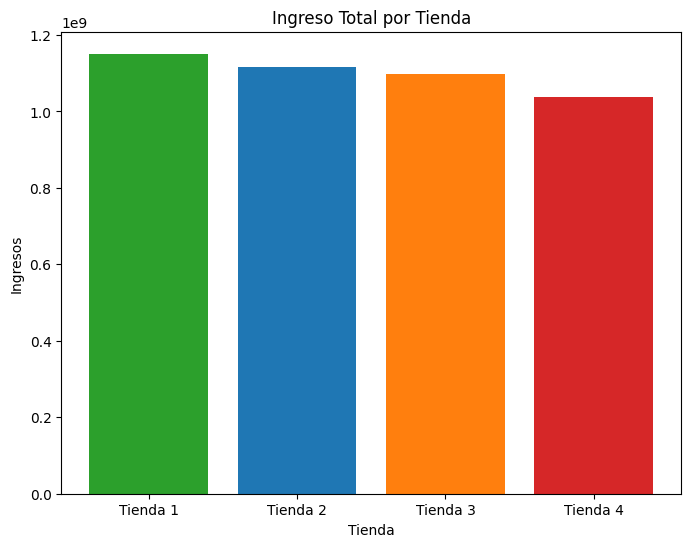

In [55]:
it = list(enumerate([tienda, tienda2, tienda3, tienda4], 1))
ingresos = [sum(i[1]['Precio']) for i in it]
tiendas = [f"Tienda {i[0]}" for i in it]

for i in (it := list(enumerate([tienda, tienda2, tienda3, tienda4], 1))):
    print(f"Los ingresos totales de la tienda {i[0]} es: $ {sum(i[1]['Precio']):,} en moneda nacional.")

plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color=['tab:green', 'tab:blue', 'tab:orange', 'tab:red'])
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel("Ingresos")
plt.show()


# 2. Ventas por Categorias



Tienda 1.
   Categoría del Producto  Número de Ventas
0                 Muebles               465
1            Electrónicos               448
2                Juguetes               324
3       Electrodomésticos               312
4    Deportes y diversión               284
5  Instrumentos musicales               182
6                  Libros               173
Tienda 2.
   Categoría del Producto  Número de Ventas
0                 Muebles               442
1            Electrónicos               422
2                Juguetes               313
3       Electrodomésticos               305
4    Deportes y diversión               275
5  Instrumentos musicales               224
6                  Libros               197
Tienda 3.
    Categoría del Producto  Número de Ventas
0                  Muebles               499
1             Electrónicos               451
2                 Juguetes               315
3        Electrodomésticos               278
4     Deportes y diversión               

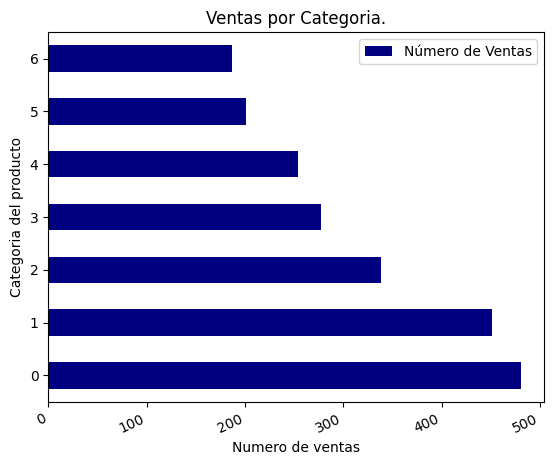

In [58]:
for i in it:
    print(f"Tienda {i[0]}.")

    categorias_v = (
            # Categoria agrupada por ventas por tienda.
            i[1].groupby(['Categoría del Producto'])
            # Ventas registradas por grupo.
            .size()
            # Ordenar de mayor a menor.
            .sort_values(ascending=False)
            # Convierte en DataFrame y renombra columna
            .reset_index(name='Número de Ventas')
            # Solicitud de cantidad de categorias (7 categorias)
            .head(7)
)

    print(categorias_v)


categorias_v.plot(kind="barh", title=f"Ventas por Categoria.", color="navy")
plt.xlabel('Numero de ventas')
plt.ylabel('Categoria del producto')
plt.xticks(rotation=25, ha='right')
plt.show()


In [ ]:
for i in it:
    print(f"Tienda {i[0]}.")

    df = (
          # Categorias ordenado por categoria y producto de las ventas realizadas.
          i[1].groupby('Categoría del Producto')
          ['Producto'].value_counts()
          # Ordenar de mayor a menor.
          .sort_values(ascending=False)
          .head(51)
          .reset_index(name='Número de Ventas')
)
    print(df)


Tienda 1.
     Categoría del Producto                     Producto  Número de Ventas
0         Electrodomésticos                   Microondas                60
1              Electrónicos                TV LED UHD 4K                60
2                   Muebles                      Armario                60
3         Electrodomésticos             Secadora de ropa                58
4                  Juguetes      Bloques de construcción                56
5                   Muebles                Mesa de noche                56
6      Deportes y diversión          Balón de baloncesto                55
7      Deportes y diversión                    Bicicleta                54
8         Electrodomésticos                 Refrigerador                54
9      Deportes y diversión                 Vaso térmico                54
10             Electrónicos                    Impresora                54
11   Instrumentos musicales                      Batería                53
12  Artículos p

# 3. Calificación promedio de la tienda


El ingreso promedio de la tienda 1 es de: $ 487867.91 moneda nacional.
El ingreso promedio de la tienda 2 es de: $ 473227.43 moneda nacional.
El ingreso promedio de la tienda 3 es de: $ 465459.77 moneda nacional.
El ingreso promedio de la tienda 4 es de: $ 440362.89 moneda nacional.


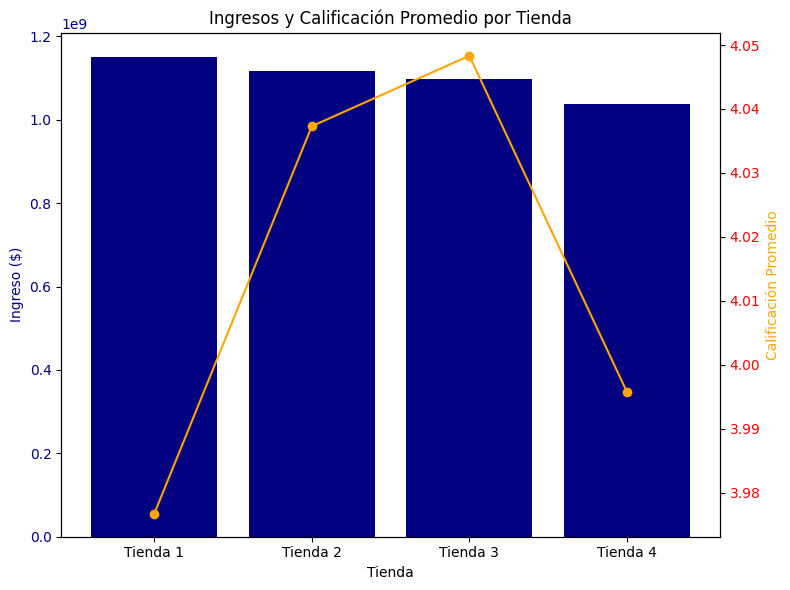

In [ ]:
for i in it:
    print(f"El ingreso promedio de la tienda {i[0]} es de: $ {round(i[1]['Precio'].mean(),2)} moneda nacional.")

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(tiendas, ingresos, color='navy', label='Ingreso')
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Ingreso ($)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()
calificaciones = [i[1]['Calificación'].mean() for i in it]
ax2.plot(tiendas, calificaciones, color='Orange', marker='o', label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', color='orange')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Ingresos y Calificación Promedio por Tienda')
fig.tight_layout()
plt.show()


In [ ]:
for i in it:
    print(f"La calificacion promedio del servicio de la tienda {i[0]} es de: {round(i[1]['Calificación'].mean(),2)}.")



La calificacion promedio del servicio de la tienda 1 es de: 3.98.
La calificacion promedio del servicio de la tienda 2 es de: 4.04.
La calificacion promedio del servicio de la tienda 3 es de: 4.05.
La calificacion promedio del servicio de la tienda 4 es de: 4.0.


# 4. Productos más y menos vendidos

In [ ]:
for i in it:
    print(f"Tienda {i[0]}.")

    df = (
          # Categorias ordenado por categoria y producto de las ventas realizadas.
          i[1].groupby('Categoría del Producto')
          ['Producto'].value_counts()
          # Ordenar de mayor a menor.
          .sort_values(ascending=False)
          .head(3)
          .reset_index(name='Número de Ventas')
)

    print(df)

Tienda 1.
  Categoría del Producto       Producto  Número de Ventas
0      Electrodomésticos     Microondas                60
1           Electrónicos  TV LED UHD 4K                60
2                Muebles        Armario                60
Tienda 2.
   Categoría del Producto                   Producto  Número de Ventas
0                  Libros  Iniciando en programación                65
1       Electrodomésticos                 Microondas                62
2  Instrumentos musicales                    Batería                61
Tienda 3.
  Categoría del Producto         Producto  Número de Ventas
0                Muebles    Kit de bancas                57
1                Muebles        Cama king                56
2                Muebles  Mesa de comedor                56
Tienda 4.
    Categoría del Producto                 Producto  Número de Ventas
0                  Muebles                 Cama box                62
1  Artículos para el hogar               Cubertería             

In [ ]:
for i in it:
    print(f"Tienda {i[0]}.")

    df = (
          # Categorias ordenado por categoria y producto de las ventas realizadas.
          i[1].groupby('Categoría del Producto')
          ['Producto'].value_counts()
          # Ordenar de mayor a menor.
          .sort_values(ascending=True)
          .head(3)
          .reset_index(name='Número de Ventas')
)

    print(df)

Tienda 1.
    Categoría del Producto                   Producto  Número de Ventas
0             Electrónicos  Auriculares con micrófono                33
1             Electrónicos               Celular ABXY                33
2  Artículos para el hogar            Olla de presión                35
Tienda 2.
  Categoría del Producto         Producto  Número de Ventas
0               Juguetes    Juego de mesa                32
1           Electrónicos        Impresora                34
2                Muebles  Mesa de comedor                34
Tienda 3.
    Categoría del Producto                 Producto  Número de Ventas
0                 Juguetes  Bloques de construcción                35
1  Artículos para el hogar             Set de vasos                36
2        Electrodomésticos               Microondas                36
Tienda 4.
   Categoría del Producto            Producto  Número de Ventas
0  Instrumentos musicales  Guitarra eléctrica                33
1                 Mueble

# 5. Envío promedio por tienda

In [ ]:
for i in it:
    print(f"El costo promedio de envio en la tienda {i[0]} es de: $ {round(i[1]['Costo de envío'].mean(),2)} moneda nacional.")

El costo promedio de envio en la tienda 1 es de: $ 26018.61 moneda nacional.
El costo promedio de envio en la tienda 2 es de: $ 25216.24 moneda nacional.
El costo promedio de envio en la tienda 3 es de: $ 24805.68 moneda nacional.
El costo promedio de envio en la tienda 4 es de: $ 23459.46 moneda nacional.


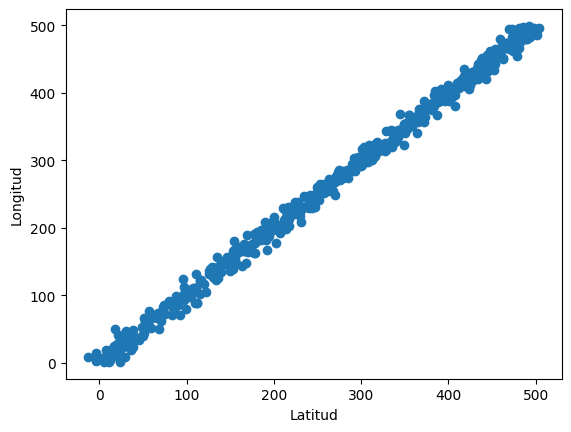

In [ ]:
data = {'lat': np.arange(500),
        'long': np.random.randint(0, 500, 500),}
data['lat'] = data['long'] + 10 * np.random.randn(500)


plt.scatter('lat', 'long', data=data)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

# Analisis y recomendaciones de rentabilidad.

Dentro del analisis realizado para determinar la menor rentabilidad en las tiendas se pudo detectar que la tienda 4 es la que presenta los menores ingresos con una cantidad de 1,038,375,700.0, otro factor que se tomo en cuenta fue la cantidad de ventaras realizadas por categoria apesar de estar en la tercera pocicion en ventas con 2188 productos vendidos.
Determinando el nivel de satisfacion del usuario la tienda 4 se encuentra en una tercera posicion con una calificacion del 4 esto indica que existe un area de oportunidad en el servicio proporcionado.
Para el costo por envio encontramos que la tienda 4 es la que tiene el menor costo promedio de envio con una cantidad de 23459.46 siendo esta la que representa in menor costo, aun no es un valor significativo para mantener una rentabilidad mayor.

Determinando de manera profecional y sugiriendo una oportunidad de reasignar los recursos, lo recomendable es vender la tienda 4 ya que es la que presenta una menor rentabilidad.